In [149]:
def print_grid(numbers):
    # Get the dimensions of the 2D list
    rows = len(numbers)
    cols = len(numbers[0])

    # Find the length of the longest number in the grid
    max_num_len = len(str(max(map(max, numbers))))

    # Loop through the rows and columns, printing each number
    for i in range(rows):
        for j in range(cols):
            # Use string formatting to center each number
            num_str = str(numbers[i][j]).ljust(max_num_len)
            print(num_str, end=' ')
        print()  # Print a newline after each row


In [150]:
def get_probs(nfrom, probs, clamp_size=5):
    import random
    # Iterate over all binary numbers of bitlength len(probs)
    result_probabilities = [0 for i in range(clamp_size * 2 + 1)]
    maxlen = 2 ** len(probs)
    for i in range(min(1000, maxlen)):
        current_prob = 1
        s = nfrom
        for bit_index in range(len(probs)):
            bit = 1 if random.random() < probs[bit_index] else 0
            if bit == 1:
                current_prob *= probs[bit_index]
                s += 1
            else:
                current_prob *= (1 - probs[bit_index])
                s -= 1
            s = max(0, min(2 * clamp_size, s))
        result_probabilities[s] += current_prob
    return result_probabilities

# The following function consumes a list probs and outputs a len(list)xlen(list) grid of probabilities
def print_probs(probs, clamp_size=5):
    # Create a 2D list of zeros
    grid = [[0 for i in range(clamp_size * 2 + 1)] for j in range(clamp_size * 2 + 1)]

    # Loop through the rows and columns, setting each value to the probability of the corresponding
    # row and column
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            grid[i] = get_probs(i, probs, clamp_size)

    # Print the grid
    print_grid(grid)

In [151]:

# def get_tanh(probs, clamp_size=5):
#     probs = [p / 2 + 0.5 for p in probs]

#     current_value = [0 for i in range(clamp_size * 2 + 1)]
#     current_value[clamp_size] = 1
#     for i in range(1):
#         next_value = [0 for j in range(len(current_value))]
#         for j in range(len(current_value)):
#             p = get_probs(j, probs, clamp_size)
#             next_value = [next_value[k] + current_value[j] * p[k] for k in range(len(p))]
#         current_value = next_value
#     return sum(current_value[clamp_size:]) * 2 - 1

def get_tanh(probs):
    import random
    import math
    total = 0
    STOCHASTIC_SIZE = 1000
    clamp = math.log2(len(probs))
    stot = 0
    for i in range(STOCHASTIC_SIZE):
        v = [random.random() < (p / 2 + 0.5) for p in probs]
        s = 0
        for j in range(len(v)):
            if v[j]:
                s += 1
            else:
                s -= 1

        if s > 0:
            stot += 1
        else:
            stot -= 1

        if stot > clamp:
            stot = clamp
        elif stot < -clamp:
            stot = -clamp

        if stot > 0:
            total += 1
    return (total / STOCHASTIC_SIZE - 0.5) * 2.0

0.11 tanh: -0.526, expected: -0.20157583274208127
0.21 tanh: -0.982, expected: -0.522789967405228
0.27 tanh: -0.6679999999999999, expected: -0.14434750955572365
0.21 tanh: -0.5880000000000001, expected: -0.13509626662469768
0.11 tanh: -0.792, expected: -0.45730489780058226


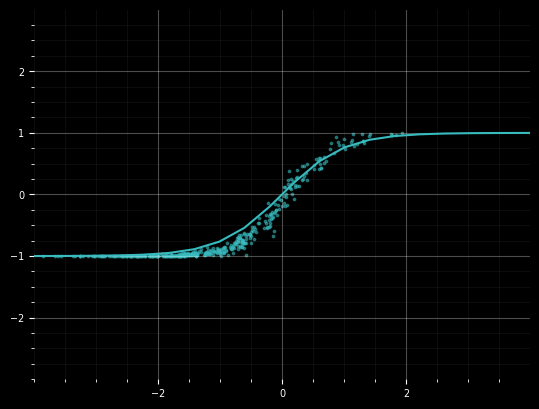

In [152]:
# Repeatedly choose n random numbers and compute Stochastic.tanh and plot the results
def test_tanh(n, k):
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    import numpy as np
    import random

    # Draw a tanh line
    x = np.linspace(-20, 20, 100)
    y = np.tanh(x)
    
    # Set the figure background color to black
    plt.rcParams['figure.facecolor'] = 'black'
    plt.rcParams['axes.facecolor'] = 'black'
    
    # Set the axes color to white
    plt.rcParams['axes.labelcolor'] = 'white'
    plt.rcParams['xtick.color'] = 'white'
    plt.rcParams['ytick.color'] = 'white'
    plt.rcParams['xtick.labelsize'] = 'x-small'
    plt.rcParams['ytick.labelsize'] = 'x-small'
    plt.rcParams['axes.edgecolor'] = 'none'
    plt.rcParams['grid.color'] = 'white'

    plt.plot(x, y, color='#38BBBF')

    for i in range(n):
        v = [random.random() * 2.0 - 1 for i in range(k)]
        t = get_tanh(v)
        plt.scatter(sum(v)-1, t, color='#38BBBF', s=3, alpha=0.5)
        if round((t - np.tanh(sum(v)-1))**2, 2) > 0.1:
            print(f"{round((t - np.tanh(sum(v)-1))**2, 2)} tanh: {t}, expected: {np.tanh(sum(v)-1)}")
    
    plt.xlim([-4,4])
    plt.ylim([-3,3])
    plt.xticks(np.arange(-4, 4, 2)[1:], color="white", )
    plt.xticks(np.arange(-4, 4, 0.5), color="white", minor=True)
    plt.yticks(np.arange(-3, 3, 1)[1:], color="white")
    plt.yticks(np.arange(-3, 3, 0.25), color="white", minor=True)
    plt.grid(which='major', axis='both', color='white', alpha=0.3)
    plt.grid(which='minor', axis='both', color='white', alpha=0.05)
    plt.show()
test_tanh(400, 32)